### Part 1: Predict the house of the price

#### importing the libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = pd.read_excel('houseprice.xlsx')
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


### Perform EDA

In [5]:
df.shape

(414, 9)

In [6]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [8]:
df.isnull()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [10]:
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


<AxesSubplot:>

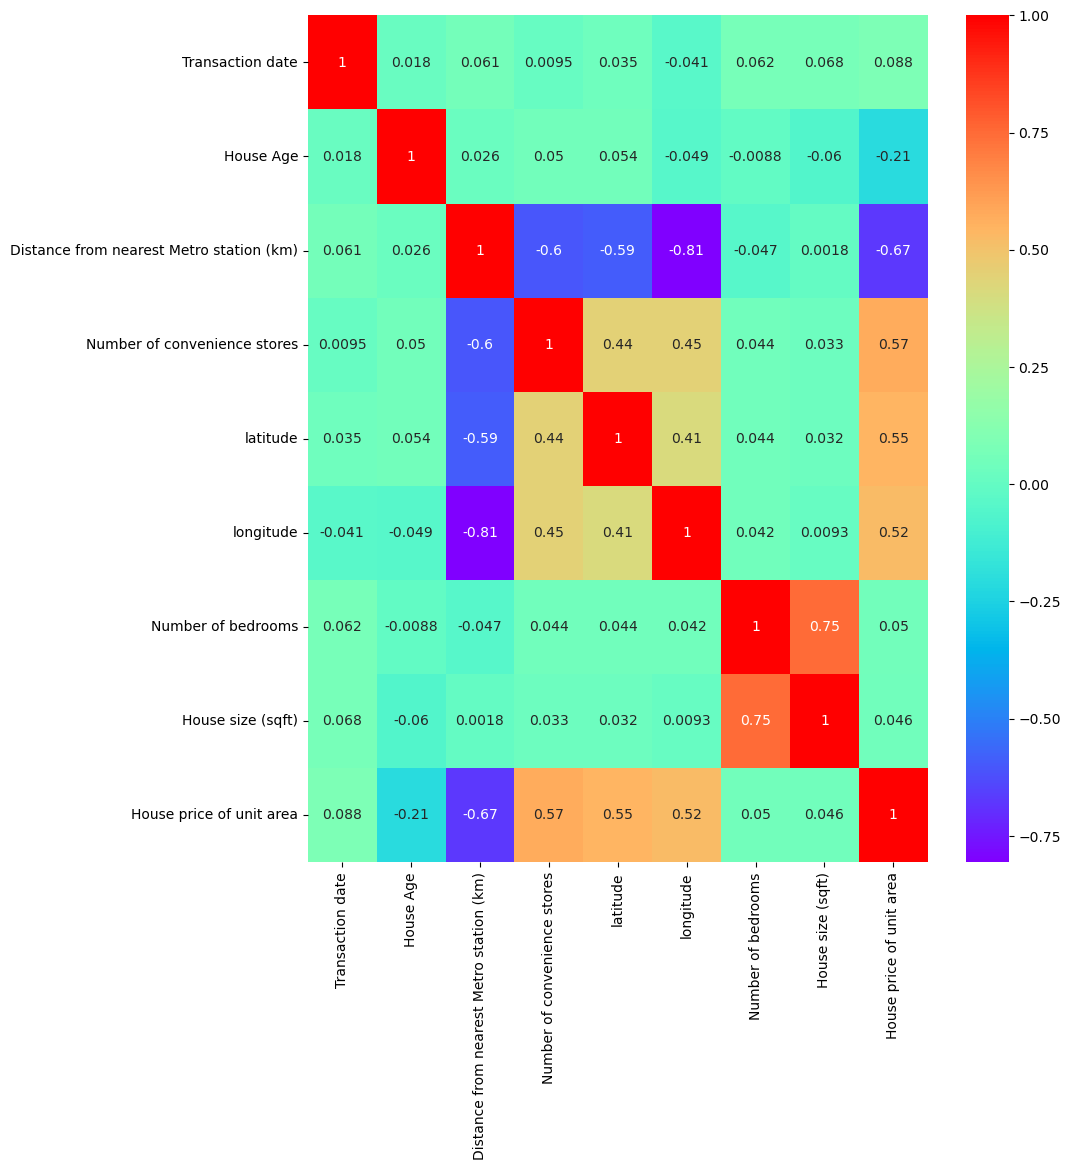

In [11]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

### From the above heatmap, we can say that number of bedrooms and house size are highly correlated.

<AxesSubplot:>

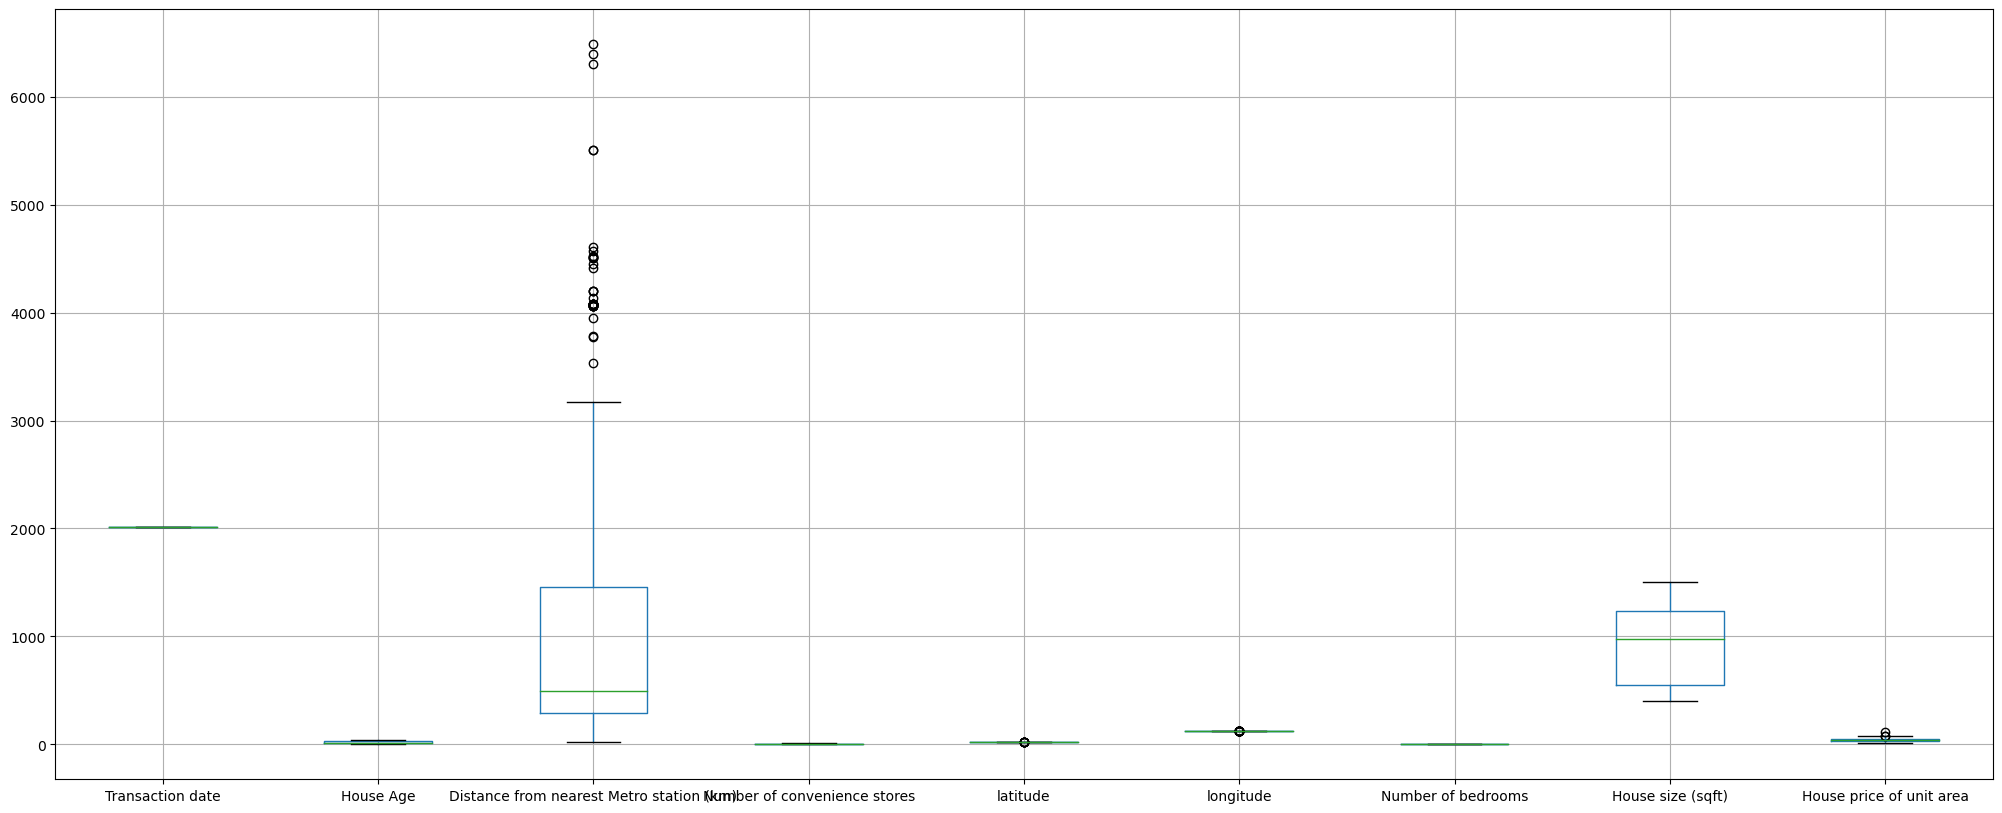

In [19]:
plt.figure(figsize=(25,10))
df.boxplot()

#### From the above boxplot, we can say that the variables 'Distance from nearest metro station' contain many outliers.So, we drop that columns.

In [23]:
df1 = df.drop(columns=['Distance from nearest Metro station (km)'])
df1

,Transaction date,House Age,Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,5,24.96674,121.54067,1,597,52.5


In [24]:
x= df.iloc[:,:-1]
x

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597


In [27]:
y = df.iloc[:,-1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 414, dtype: float64

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [35]:
k = 42
models = [LinearRegression(), DecisionTreeRegressor(random_state=k), RandomForestRegressor(random_state=k), Lasso(random_state=k)
         ,Ridge(random_state=k),SVR(), AdaBoostRegressor(random_state=k), GradientBoostingRegressor(random_state=k)]
for i in models:
    print(20*'=',i,20*'=')
    model=i
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('R^2 Score   :' ,r2_score(y_test,y_pred))
    print('Mean Absolute Error :' ,mean_absolute_error(y_test,y_pred))
    print(70*'*')

==================== LinearRegression() ====================
R^2 Score   : 0.6676407266399518
Mean Absolute Error : 5.495348368523826
**********************************************************************
==================== DecisionTreeRegressor(random_state=42) ====================
R^2 Score   : 0.5891125787512279
Mean Absolute Error : 5.662650602409639
**********************************************************************
==================== RandomForestRegressor(random_state=42) ====================
R^2 Score   : 0.8401507316252514
Mean Absolute Error : 3.810132530120484
**********************************************************************
==================== Lasso(random_state=42) ====================
R^2 Score   : 0.6400794495084652
Mean Absolute Error : 5.736476525992771
**********************************************************************
==================== Ridge(random_state=42) ====================
R^2 Score   : 0.6419339166867175
Mean Absolute Error : 5.76942241384137

#### So,here we can see that Random forest has minimum error and highest accuracy, so we can say that this is a best model for our problem statement.